In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/parkjubro/Desktop/Dacon/data/train.csv')
test = pd.read_csv('/Users/parkjubro/Desktop/Dacon/data/test.csv')
train.shape, test.shape

((1253, 10), (2924, 9))

In [41]:
train

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Gender_F,Gender_I,Gender_M,Range
0,1,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,15,0,0,1,3
1,2,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,8,0,1,0,1
2,3,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,18,0,1,0,3
3,4,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,13,0,0,1,2
4,5,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,6,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,1249,0.190,0.145,0.040,0.0315,0.0165,0.0065,0.0150,4,0,1,0,1
1249,1250,0.395,0.310,0.085,0.2465,0.1530,0.0505,0.0935,7,0,1,0,1
1250,1251,0.525,0.410,0.115,0.5960,0.4160,0.1630,0.1800,7,1,0,0,1
1251,1252,0.445,0.335,0.110,0.3220,0.2025,0.1095,0.1195,6,1,0,0,1


In [4]:
# Data feature 확인
print('Gender:',train['Gender'].unique())

train.describe()

Gender: ['M' 'I' 'F']


,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [5]:
from mlxtend.plotting import scatterplotmatrix

In [6]:
train.columns

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [7]:
from mlxtend.plotting import heatmap

In [8]:
train[train['Target'] > 20]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,217,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,449,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,554,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,630,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,736,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,763,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,793,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1132,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,1141,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1173,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [9]:
train = train.drop(index = [762], axis = 0)

In [10]:
train[train['Whole Weight'] < train['Shucked Weight'] + train['Shell Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,848,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [11]:
train = train.drop(index = [47, 382, 435, 847, 1078], axis = 0)

In [12]:
train[train['Shucked Weight'] < train['Viscra Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [13]:
train = train.drop(index = [465], axis = 0)

In [14]:
train['Shell Water'] = train['Whole Weight'] - (train['Shucked Weight']+train['Shell Weight'])
train['Whole Weight'] = train['Whole Weight'] - train['Shell Water']
train = train.drop(columns = ['Shell Water'], axis = 1)

In [15]:
test['Shell Water'] = test['Whole Weight'] - (test['Shucked Weight']+test['Shell Weight'])
test['Whole Weight'] = test['Whole Weight'] - test['Shell Water']
test = test.drop(columns = ['Shell Water'], axis = 1)

In [16]:
train = pd.get_dummies(train)

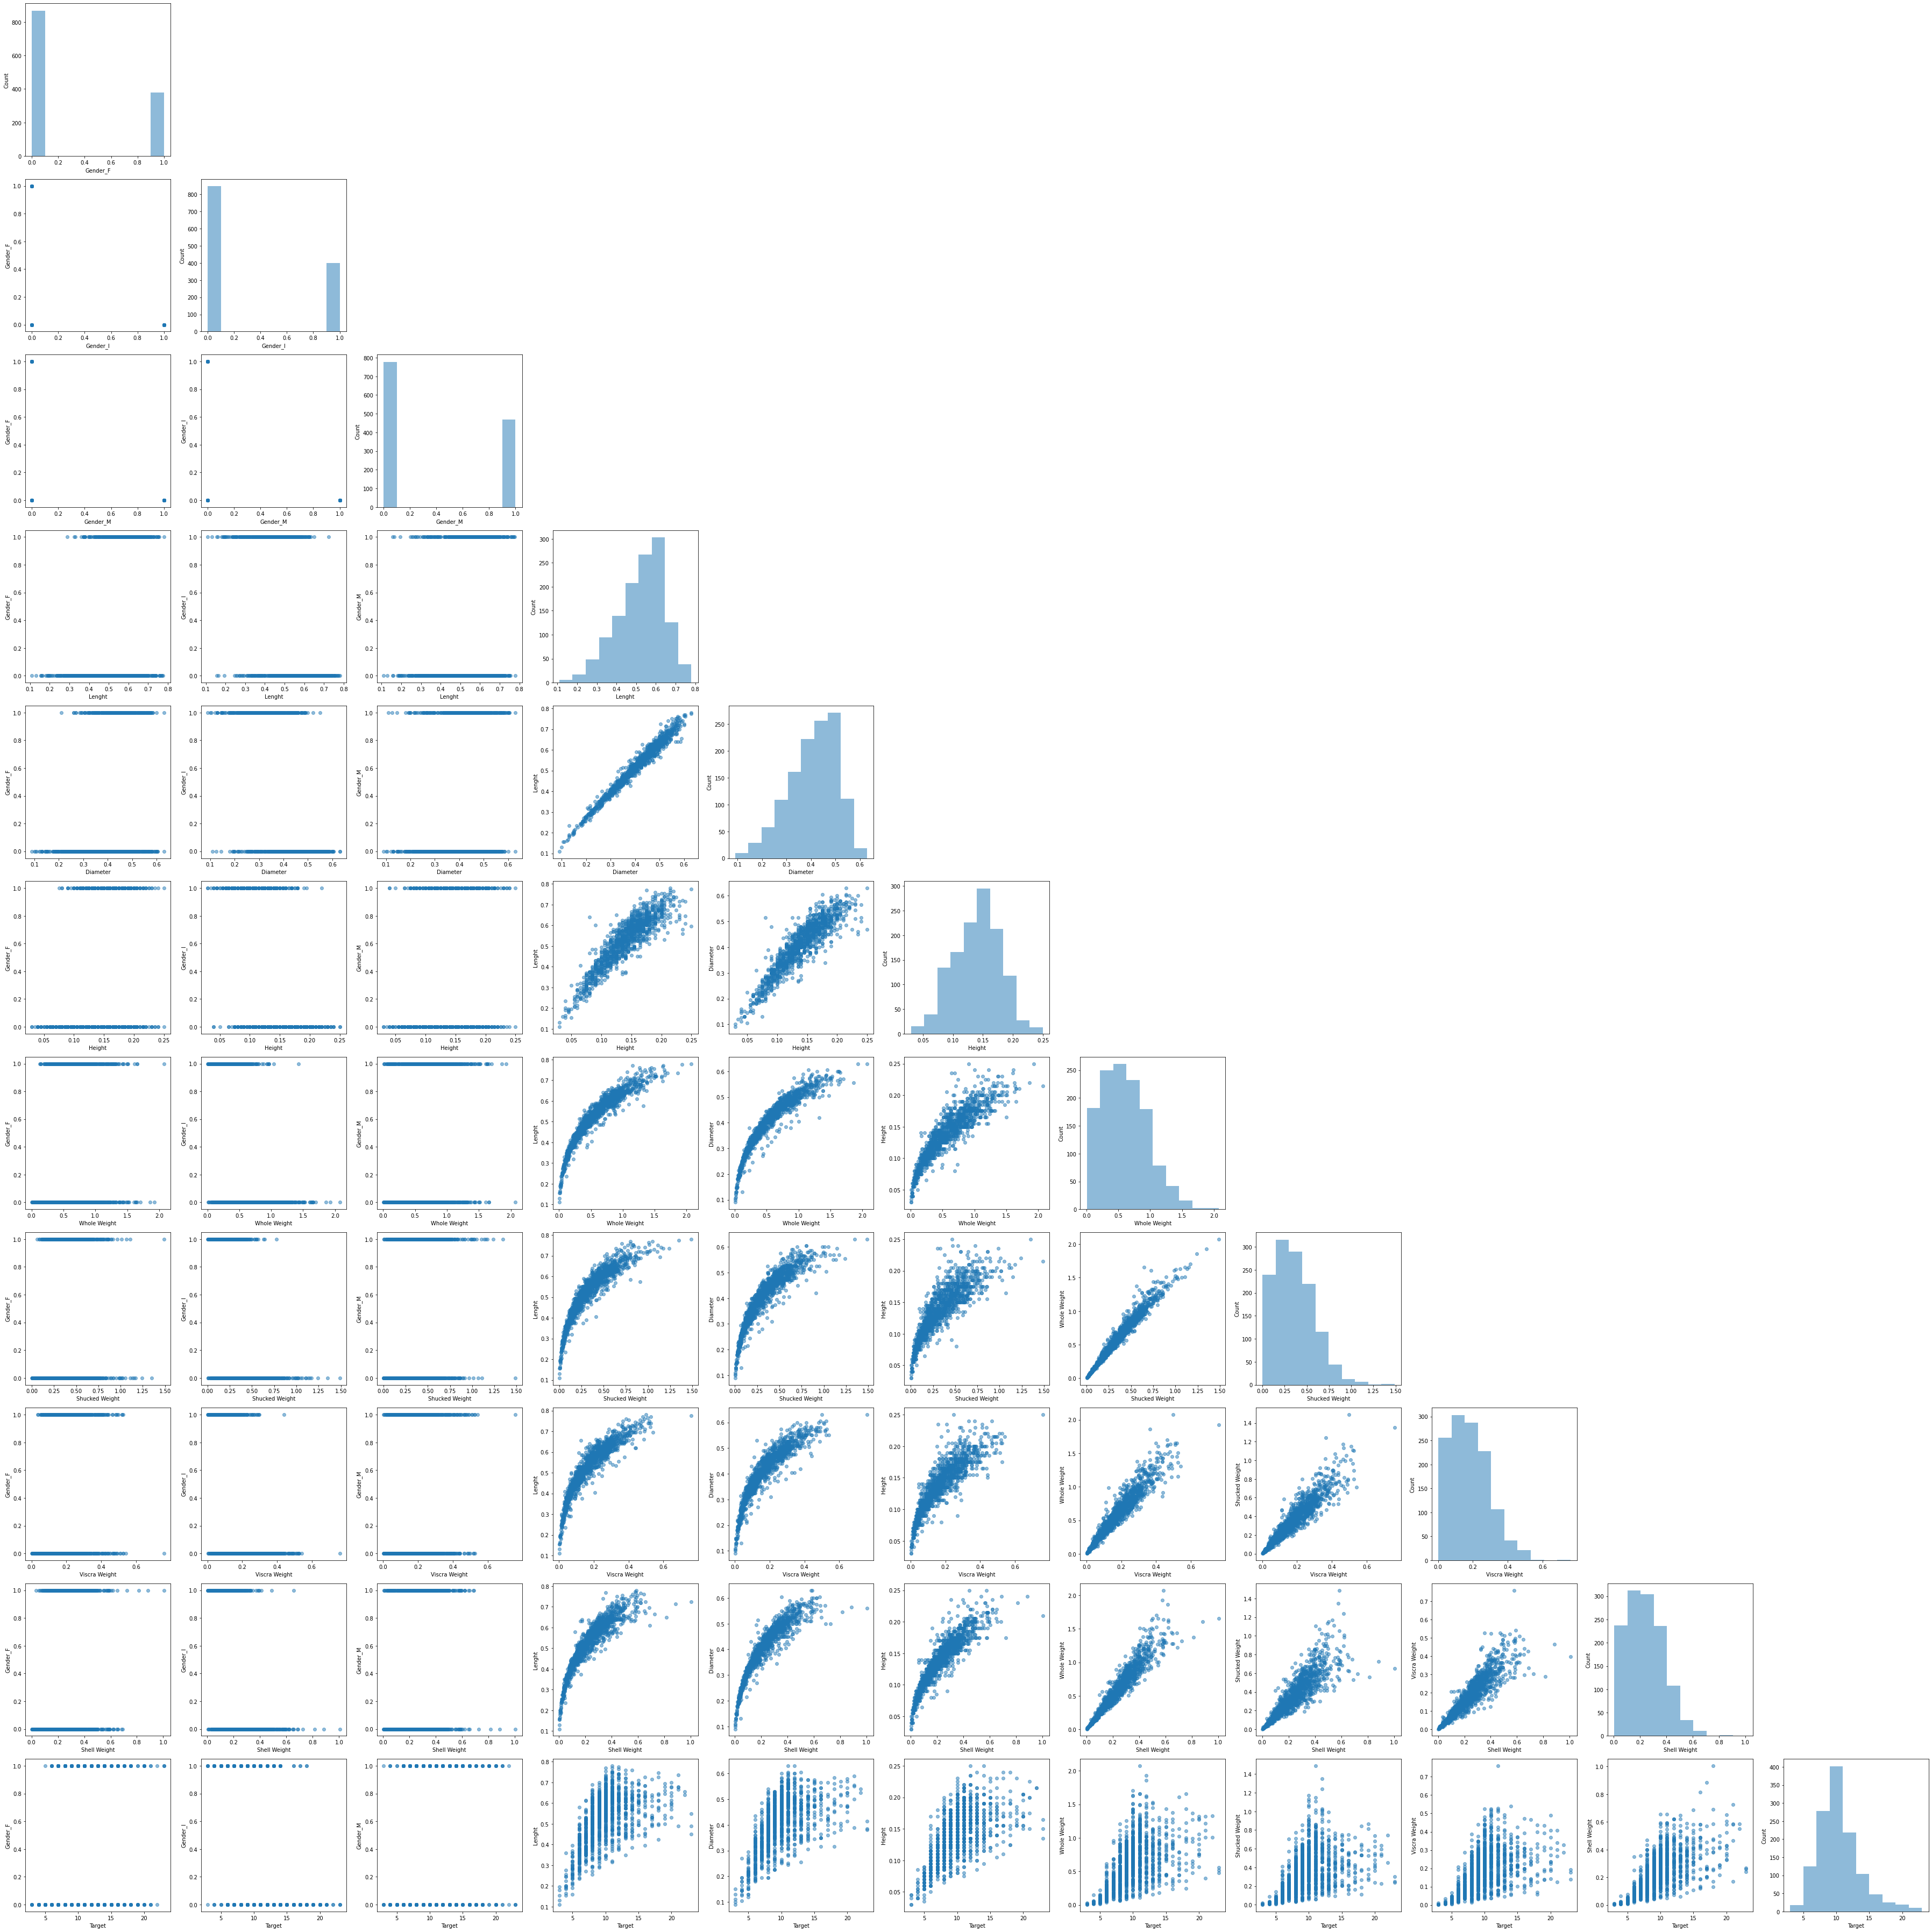

In [17]:
cols = ['Gender_F', 'Gender_I','Gender_M', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
        'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']
scatterplotmatrix(train[cols].values, figsize=(50,50),
                 names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

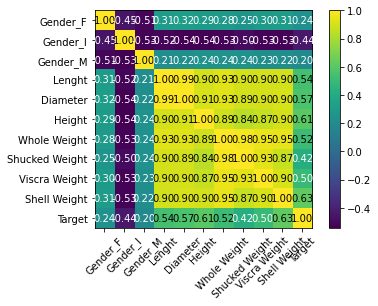

In [18]:
cm = np.corrcoef(train[cols].values.T)
hm = heatmap(cm,
            row_names=cols,
            column_names=cols,
            )
plt.show()
# height = 0.6, shell weight =0.63

<AxesSubplot:xlabel='Target', ylabel='Count'>

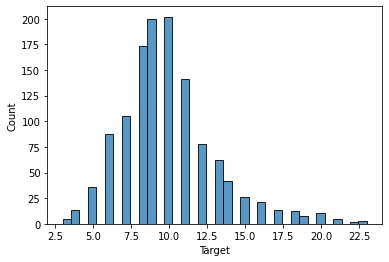

In [19]:
sns.histplot(train['Target'])

In [20]:
train_T=train['Target']
target=[]
for i in range(len(train_T)):
    if train_T.iloc[i] < 10:
        target.append(1)
    elif train_T.iloc[i] < 15:
        target.append(2)
    else:
        target.append(3)
        
train["Range"] = target

<AxesSubplot:xlabel='Range', ylabel='count'>

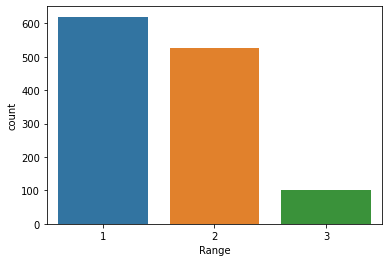

In [21]:
sns.countplot(x = train["Range"])

In [22]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

train_X = train.drop(columns=['id', 'Target'], axis = 1)
train_X.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M,Range
0,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,0,0,1,3
1,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,0,1,0,1
2,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,0,1,0,3
3,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,0,0,1,2
4,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,0,1,0,1


In [23]:
train_y = train['Target']
train_y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

In [24]:
ros = RandomOverSampler(random_state=0)
train_X_resampled, train_y_resampled = ros.fit_resample(train_X, train_y)
train_X_resampled = train_X_resampled.drop(columns = ['Range'], axis = 1)
train_X_resampled


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,0,0,1
1,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,0,1,0
2,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,0,1,0
3,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,0,0,1
4,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4237,0.450,0.380,0.165,0.5150,0.2500,0.1915,0.2650,1,0,0
4238,0.550,0.415,0.135,0.5620,0.3020,0.1790,0.2600,1,0,0
4239,0.550,0.415,0.135,0.5620,0.3020,0.1790,0.2600,1,0,0
4240,0.450,0.380,0.165,0.5150,0.2500,0.1915,0.2650,1,0,0


In [25]:
from collections import Counter
print(sorted(Counter(train_y_resampled).items()))

[(3, 202), (4, 202), (5, 202), (6, 202), (7, 202), (8, 202), (9, 202), (10, 202), (11, 202), (12, 202), (13, 202), (14, 202), (15, 202), (16, 202), (17, 202), (18, 202), (19, 202), (20, 202), (21, 202), (22, 202), (23, 202)]


In [26]:
test = pd.get_dummies(test)
test.head()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,1,0.595,0.470,0.155,0.6065,0.4515,0.1780,0.1550,1,0,0
1,2,0.580,0.450,0.150,0.6360,0.2760,0.1815,0.3600,0,0,1
2,3,0.260,0.205,0.070,0.0720,0.0415,0.0190,0.0305,0,1,0
3,4,0.590,0.460,0.130,0.7850,0.4550,0.2055,0.3300,0,0,1
4,5,0.595,0.465,0.140,0.8225,0.5175,0.2440,0.3050,1,0,0


In [27]:
test = test.drop(columns = ['id'], axis=1)
test.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.595,0.470,0.155,0.6065,0.4515,0.1780,0.1550,1,0,0
1,0.580,0.450,0.150,0.6360,0.2760,0.1815,0.3600,0,0,1
2,0.260,0.205,0.070,0.0720,0.0415,0.0190,0.0305,0,1,0
3,0.590,0.460,0.130,0.7850,0.4550,0.2055,0.3300,0,0,1
4,0.595,0.465,0.140,0.8225,0.5175,0.2440,0.3050,1,0,0


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor()
model.fit(train_X_resampled, train_y_resampled)

RandomForestRegressor()

In [30]:
prediction = model.predict(test)

In [31]:
submission = pd.read_csv('/Users/parkjubro/Desktop/Dacon/data/sample_submission.csv')
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [32]:
submission['Target'] = prediction

submission

,id,Target
0,1,7.77
1,2,12.63
2,3,4.99
3,4,10.48
4,5,10.51
...,...,...
2919,2920,4.54
2920,2921,6.69
2921,2922,9.28
2922,2923,11.06


In [33]:
print(model.score(train_X_resampled, train_y_resampled))

0.9972530487334448


In [34]:
submission.to_csv('submit_7.csv', index=False)

In [35]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train_X_resampled, train_y_resampled)

LinearRegression()

In [36]:
prediction = mlr.predict(test)

In [37]:
submission = pd.read_csv('/Users/parkjubro/Desktop/Dacon/data/sample_submission.csv')
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [38]:
submission['Target'] = prediction
submission

,id,Target
0,1,12.892578
1,2,16.435547
2,3,5.978516
3,4,12.398438
4,5,12.390625
...,...,...
2919,2920,1.947266
2920,2921,8.779297
2921,2922,10.531250
2922,2923,9.625000


In [39]:
print(mlr.score(train_X_resampled, train_y_resampled))

0.6728412285061993


In [40]:
submission.to_csv('submit_6.csv', index=False)